In [1]:
import sys
import os
import numpy as np
import matplotlib
# matplotlib.use('pdf') # do this because environment does not have GUI backend
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from scipy.special import factorial
import seaborn as sns
import pandas as pd
import re
import statistics
from scipy import stats
import math

font = {'size':8,
        'family':'Arial'}
matplotlib.rc('font', **font)

### Magnetic separation for vTR-CoV screen

#### Flow distributions featured in S1A & S1E - files and original flow analysis in 'vTR_Screens_magsep' folder

In [2]:
df = pd.read_csv('../Flow Single-Cell Data - CSV/vTR_Screens_magsep_single-cell.csv')
df = df[(df['P1']==True) & (df['P2']==True)]
df = df.rename(columns={'Citrine':'Citrine_Act'})
df['Citrine_Rep'] = np.where(df['Citrine-A']>1e7, True, False)
df = df[df['Fraction']!='wash']
df['Fraction'] = pd.Categorical(df['Fraction'], categories=['pre-magsep', 'unbound', 'bound'])
aggdf = df.groupby(by=['Reporter', 'Fraction'], as_index=False).mean().sort_values(by=['Reporter', 'Fraction'])

aggdf

,Reporter,Fraction,Citrine-A,FSC 488/10-A,FSC 488/10-H,SSC 488/10-A,mCherry-A,P1,P2,mCherry,Citrine_Act,Citrine_Rep
0,DY032,pre-magsep,1.377471e+06,8.794198e+08,4.836851e+08,3.483231e+08,8.831202e+07,1.0,1.0,0.927334,0.013089,0.005869
1,DY032,unbound,6.884401e+05,8.969387e+08,4.994475e+08,3.545988e+08,9.064221e+07,1.0,1.0,0.934093,0.003309,0.000184
2,DY032,bound,2.142941e+07,8.898596e+08,4.918313e+08,1.209163e+09,1.108465e+08,1.0,1.0,0.960784,0.784314,0.529412
3,JT039,pre-magsep,4.922910e+07,1.210235e+09,1.042023e+09,4.800368e+08,1.174088e+08,1.0,1.0,0.931687,0.917460,0.884549
4,JT039,unbound,5.405657e+06,1.438483e+09,1.233950e+09,4.114139e+08,1.037036e+08,1.0,1.0,0.885413,0.260966,0.156816
5,JT039,bound,4.850747e+07,1.188169e+09,9.378513e+08,1.217160e+09,1.103400e+08,1.0,1.0,0.981646,0.973762,0.938655


In [5]:
font = {'size':8,
        'family':'Arial'}
matplotlib.rc('font', **font)

tempdf = df.copy()
tempdf['mCitrine'] = np.log10(tempdf['Citrine-A'])

def plot_magsep(data_df, agg_df, screentype):
    if screentype == 'Activation':
        reporter = 'DY032'
        citrine = 'Citrine_Act'
        color = '#F3CE48'
        cutoff = 3e6
    elif screentype == 'Repression':
        reporter = 'JT039'
        citrine = 'Citrine_Rep'
        color = '#23BEDB'
        cutoff = 1e7
    
    ON = list(agg_df[agg_df['Reporter']==reporter][citrine])
    ON = [round(on*100, 1) for on in ON]
    OFF = [str(round(100-on, 1)) + '%' for on in ON]
    ON = [str(on) + '%' for on in ON]
    
    pal = sns.color_palette([color, color])
    g = sns.FacetGrid(data=data_df[data_df['Reporter']==reporter],
                      col='Fraction', hue='Replicate', palette=pal,
                      aspect=0.92, height=1.35)
    g.map(sns.kdeplot, 'mCitrine', fill=True, bw_adjust=1)
    g.set_titles(template='{col_name}')
    
    plt.xlim([4.5,9.5])
    plt.ylim([0,2.7])
    plt.xticks([5, 6, 7, 8, 9], ['10$^5$', '10$^6$', '10$^7$', '10$^8$', '10$^9$'])
    for i, ax, on, off in zip(range(6), g.axes.flat, ON, OFF):
        ax.text(0.05, 0.95, off, transform=ax.transAxes, ha='left', va='top')
        ax.text(0.95, 0.95, on, transform=ax.transAxes, ha='right', va='top')
        ax.axvline(x=np.log10(cutoff), ls=':', color='#333333', lw=1)
#         ax.grid(False)
    
    plt.savefig('../Individual Figure Panels/Figure S1/vTR_Screens_%s_magsep_kdeplot.png' % screentype, dpi=1200)
    plt.close()
    
    
plot_magsep(tempdf, aggdf, 'Activation')
plot_magsep(tempdf, aggdf, 'Repression')

print('Complete')

Complete


### Screen Validation

#### Files in 'vTR_validations_endpoint'

In [6]:
df = pd.read_csv('../Flow Single-Cell Data - CSV/vTR_Screen_validations_endpoint_single-cell.csv')
df = df[(df['P1']==True) & (df['P2']==True) & (df['mCherry']==True)]
df = df.rename(columns={'Citrine':'Citrine_Act'})
df['Citrine_Rep'] = np.where(df['Citrine-A']>1e7, True, False)
df.loc[df['Protein'].isna(), 'Protein'] = 'empty' 

aggdf = df.groupby(by=['Reporter', 'Condition', 'Construct', 'Protein', 'Replicate', 'Time'], as_index=False).mean()
aggdf

C:\Users\cludw\anaconda3\envs\cytoflow\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Reporter,Condition,Construct,Protein,Replicate,Time,Citrine-A,FSC 488/10-A,FSC 488/10-H,SSC 488/10-A,mCherry-A,P1,P2,mCherry,Citrine_Act,Citrine_Rep
0,DY032,dox,CL104,HAdV9 E1A,Rep1,2.0,2.693191e+08,9.886035e+08,8.191846e+08,3.241502e+08,4.757905e+07,1.0,1.0,1.0,0.987025,0.982661
1,DY032,dox,CL104,HAdV9 E1A,Rep2,2.0,2.594461e+08,1.085741e+09,9.021638e+08,3.249462e+08,4.689172e+07,1.0,1.0,1.0,0.988166,0.983955
2,DY032,dox,CL105,HPV5 E6,Rep1,2.0,5.149083e+07,1.052528e+09,8.753879e+08,3.074990e+08,6.025845e+07,1.0,1.0,1.0,0.698483,0.568630
3,DY032,dox,CL105,HPV5 E6,Rep2,2.0,5.251572e+07,1.114044e+09,9.285597e+08,3.093457e+08,5.899552e+07,1.0,1.0,1.0,0.707332,0.573258
4,DY032,dox,CL106,KSHV ORF50,Rep1,2.0,2.922340e+08,1.043477e+09,8.766210e+08,3.207817e+08,6.480207e+07,1.0,1.0,1.0,0.984022,0.971791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,JT039,nodox,CL146,MERS-CoV S,Rep2,5.0,7.837487e+07,1.099379e+09,9.290254e+08,4.264158e+08,1.226881e+08,1.0,1.0,1.0,0.914670,0.892319
208,JT039,nodox,CL147,random,Rep1,5.0,9.314749e+07,1.165650e+09,9.826355e+08,4.511161e+08,1.147028e+08,1.0,1.0,1.0,0.909038,0.899342
209,JT039,nodox,CL147,random,Rep2,5.0,9.204453e+07,1.172366e+09,9.904287e+08,4.508455e+08,1.140141e+08,1.0,1.0,1.0,0.914282,0.903046
210,JT039,nodox,JT126,empty,Rep1,5.0,1.061003e+08,1.233167e+09,1.058222e+09,4.272538e+08,1.827727e+08,1.0,1.0,1.0,0.912822,0.894921


In [51]:
constructDict = {'CL144':['Human', 'MYBA', '', ''],
                 'CL145':['Human', 'KRAB', '', ''],
                 'CL147':['', 'randomer', '', ''],
                 'JT126':['', 'empty', '', '']}

data = pd.read_csv('../Supplemental Tables - CSV/vTR-CoV-tiling/vTR-CoV_ActivD2-ReprD5_detailed.csv')
key = pd.read_csv('../Flow Single-Cell Data - CSV/vTR_validations_key.csv')
key = key[['Construct', 'Tile_ID']].rename(columns={'Tile_ID':'Oligo ID'})
key = pd.merge(key, data, on='Oligo ID', how='left')

for i in constructDict:
    key.loc[key['Construct']==i, 'Virus Abbreviation'] = constructDict[i][0]
    key.loc[key['Construct']==i, 'Protein'] = constructDict[i][1]
    key.loc[key['Construct']==i, 'Tile Start'] = constructDict[i][2]
    key.loc[key['Construct']==i, 'Tile End'] = constructDict[i][3]
key.loc[key['Protein']=='ORF50', 'Protein'] = 'RTA'

aggdfA = aggdf[aggdf['Reporter']=='DY032']
aggdfA = aggdfA[['Construct', 'Condition', 'Replicate', 'Citrine_Act']]
aggdfA['Citrine OFF'] = 1 - aggdfA['Citrine_Act']

normdf = aggdfA[aggdfA['Condition']=='dox']
normdf['Norm Citrine ON'] = normdf['Citrine_Act']*100
normdf = normdf.groupby(by=['Construct'])['Norm Citrine ON'].agg(['mean', 'std']).reset_index()
normdf = normdf.rename(columns={'mean':'Norm Citrine ON', 'std':'ON std'})
keyA = pd.merge(key, normdf, on='Construct', how='left')

aggdfR = aggdf[aggdf['Reporter']=='JT039']
aggdfR = aggdfR[['Construct', 'Condition', 'Replicate', 'Citrine_Rep']]
aggdfR['Citrine OFF'] = 1 - aggdfR['Citrine_Rep']

normdf = aggdfR[aggdfR['Condition']=='dox']
normdf['Norm Citrine OFF'] = normdf['Citrine OFF']*100
normdf = normdf.groupby(by=['Construct'])['Norm Citrine OFF'].agg(['mean', 'std']).reset_index()
normdf = normdf.rename(columns={'mean':'Norm Citrine OFF', 'std':'OFF std'})
keyR = pd.merge(key, normdf, on='Construct', how='left')
keyR

<ipython-input-51-bac2562867c5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normdf['Norm Citrine ON'] = normdf['Citrine_Act']*100
<ipython-input-51-bac2562867c5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normdf['Norm Citrine OFF'] = normdf['Citrine OFF']*100


,Construct,Oligo ID,R1,countsOFF_R1,countsON_R1,R2,countsOFF_R2,countsON_R2,Avg,Standard Error,...,Baltimore Class,Genome Type,In Original,Duplicate,countsSUM_R1,countsSUM_R2,Hit,Screen,Norm Citrine OFF,OFF std
0,CL104,vTR_Q9YLA0_003,10.923683,20.0,27336.0,11.574159,12.0,18304.0,11.248921,0.325238,...,1,DNA,1.0,0.0,27356.0,18316.0,1.0,Activation,NaN,NaN
1,CL104,vTR_Q9YLA0_003,-0.019789,61.0,83.0,-0.107276,68.0,92.0,-0.063533,0.043743,...,1,DNA,1.0,0.0,144.0,160.0,0.0,Repression,NaN,NaN
2,CL105,vTR_P06930_001,9.610946,42.0,23109.0,9.607975,53.0,20690.0,9.609461,0.001485,...,1,DNA,1.0,0.0,23151.0,20743.0,1.0,Activation,84.084538,3.504967
3,CL105,vTR_P06930_001,2.661552,99.0,21.0,3.473873,115.0,13.0,3.067712,0.406161,...,1,DNA,1.0,0.0,120.0,128.0,1.0,Repression,84.084538,3.504967
4,CL106,vTR_F5HCV3_059,10.380430,167.0,156634.0,9.662505,294.0,119192.0,10.021468,0.358962,...,1,DNA,1.0,0.0,156801.0,119486.0,1.0,Activation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,CL146,CoV_K9N5Q8_089,-1.433318,5834.0,1520.0,-1.792812,6850.0,989.0,-1.613065,0.179747,...,4,RNA,1.0,0.0,7354.0,7839.0,0.0,Activation,14.922103,0.251479
85,CL146,CoV_K9N5Q8_089,0.604506,1330.0,1174.0,0.101836,851.0,996.0,0.353171,0.251335,...,4,RNA,1.0,0.0,2504.0,1847.0,0.0,Repression,14.922103,0.251479
86,CL147,CoV_random_set05_0485,-0.067450,1035.0,695.0,0.241693,1082.0,640.0,0.087122,0.154571,...,-,-,1.0,0.0,1730.0,1722.0,0.0,Activation,9.527010,0.075414
87,CL147,CoV_random_set05_0485,-0.358912,165.0,284.0,-0.368479,177.0,287.0,-0.363696,0.004783,...,-,-,1.0,0.0,449.0,464.0,0.0,Repression,9.527010,0.075414


#### Correlation plot featured in Fig. S1D

In [8]:
# detection thresholds from screen
cutoffA_vTR = 3.24704700060297
cutoffR_vTR = 0.6920252964595188

0.8550427350427351 2.6576323409491504e-08


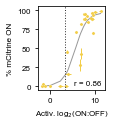

In [42]:
from scipy.optimize import curve_fit
from scipy.stats import spearmanr
# thresh = -np.log(p[0]/(0.4-p[3]) - 1)/p[2] + p[1]
colorA = '#F3CE48' #'#E3B919'

plt.figure(figsize=(1.6,1.8))
plotDF = keyA[(keyA['Screen']!='Repression') & (~keyA['Norm Citrine ON'].isna()) & (~keyA['Avg'].isna())].sort_values('Avg')

sns.scatterplot(data=plotDF, x='Avg', y='Norm Citrine ON', color=colorA, s=10)
x = np.array(list(plotDF['Avg']))
y = np.array(list(plotDF['Norm Citrine ON']))
xerr = list(plotDF['Standard Error'])
yerr = list(plotDF['ON std'])
for xi, yi, xe, ye in zip(list(x), list(y), xerr, yerr):
    plt.errorbar(x=xi, y=yi, xerr=xe, yerr=ye, color=colorA, lw=1)

def logistic(x, A, x0, k, off):
    return A/(1 + np.exp(-k*(x-x0)))+off
p, _ = curve_fit(logistic, x, y, p0=[10,6,1,0])
plt.plot(x, logistic(x, *p), color='#999999', lw=1, zorder=0)

coef, p = spearmanr(x, y)
print(coef, p)
plt.annotate('r = ' + str(round(coef, 2)), xy=(11.4, 0), ha='right', va='bottom')
plt.axvline(x=cutoffA_vTR, ls=':', lw=1, color='#333333')
plt.xlabel('Activ. log$_2$(ON:OFF)')
# plt.ylabel('Norm. % mCitrine ON')
plt.ylabel('% mCitrine ON')
plt.ylim(-5, 105)
plt.tight_layout()
plt.savefig('../Individual Figure Panels/Figure S1/vTR-CoV_Act_screen-validation_correlation.png', dpi=1200)


#### Correlation plot featured in S1H

0.9215384615384615 6.299786486012459e-11


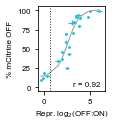

In [43]:
from scipy.optimize import curve_fit
from scipy.stats import spearmanr
colorR = '#23BEDB' #'#1BC6EE'

plt.figure(figsize=(1.6,1.8))
plotDF = keyR[(keyR['Screen']!='Activation') & (~keyR['Norm Citrine OFF'].isna()) & (~keyR['Avg'].isna())].sort_values('Avg')
# plotDF = plotDF[~plotDF['Construct'].isin(['CL142', 'CL143', 'CL146'])]

sns.scatterplot(data=plotDF, x='Avg', y='Norm Citrine OFF', color=colorR, s=10)
x = np.array(list(plotDF['Avg']))
y = np.array(list(plotDF['Norm Citrine OFF']))
xerr = list(plotDF['Standard Error'])
yerr = list(plotDF['OFF std'])
for xi, yi, xe, ye in zip(list(x), list(y), xerr, yerr):
    plt.errorbar(x=xi, y=yi, xerr=xe, yerr=ye, color=colorR, lw=1)

def logistic(x, A, x0, k, off):
    return A/(1 + np.exp(-k*(x-x0)))+off
p, _ = curve_fit(logistic, x, y, p0=[100,6,1,0])
plt.plot(x, logistic(x, *p), color='#999999', lw=1, zorder=0)

coef, p = spearmanr(x, y)
print(coef, p)
plt.annotate('r = ' + str(round(coef, 2)), xy=(6.2, 0), ha='right', va='bottom')
plt.axvline(x=cutoffR_vTR, ls=':', lw=1, color='#333333')
plt.xlabel('Repr. log$_2$(OFF:ON)')
# plt.ylabel('Norm. % mCitrine OFF')
plt.ylabel('% mCitrine OFF')
plt.ylim(-5, 105)
plt.tight_layout()
plt.savefig('../Individual Figure Panels/Figure S1/vTR-CoV_Rep_screen-validation_correlation.png', dpi=1200)


#### All validation flow cytometry distributions (not featured in a panel)

In [27]:
font = {'size':8,
        'family':'Arial'}
matplotlib.rc('font', **font)

def plot_validations(df, screentype, key):
    if screentype == 'Activation':
        reporter = 'DY032'
        color = '#F3CE48'
        yvar = 'Norm Citrine ON'
        opposite = 'Repression'
        cutoff = 3e6
    elif screentype == 'Repression':
        reporter = 'JT039'
        color = '#23BEDB'
        yvar = 'Norm Citrine OFF'
        opposite = 'Activation'
        cutoff = 1e7
    
    df = df[df['Reporter']==reporter]
    df['mCitrine'] = np.log10(df['Citrine-A'])
    df = df.drop(columns='Protein')
    df = pd.merge(df, key[['Construct', 'Avg', 'Virus Abbreviation', 'Protein', 'Tile Start', 'Tile End', yvar, 'Screen']], how='left', on='Construct')
    df.loc[df['Avg'].isna(), 'Avg'] = -10
    df['Condition'] = pd.Categorical(df['Condition'], categories=['nodox', 'dox'], ordered=True)
    df = df.sort_values(by=['Avg', 'Condition', 'Replicate'], ascending=[False, True, True])
    df['Condition-Replicate'] = df['Condition'].astype(str) + '-' + df['Replicate']

    labeldf = df[df['Screen']!=opposite].sort_values(by=['Avg'], ascending=False)
    labeldf = labeldf[['Construct', 'Virus Abbreviation', 'Protein', 'Tile Start', 'Tile End', yvar, 'Avg']].drop_duplicates()
    labeldf['Tile Start'] = np.where(labeldf['Tile Start']=='', labeldf['Tile Start'], labeldf['Tile Start'].astype(str).str.split('.').str[0])
    labeldf['Tile End'] = np.where(labeldf['Tile End']=='', labeldf['Tile End'], labeldf['Tile End'].astype(str).str.split('.').str[0])
    labeldf['Sample'] = np.where(labeldf['Tile Start']=='', labeldf['Virus Abbreviation'] + ' ' + labeldf['Protein'],
                             labeldf['Virus Abbreviation'] + ' ' + labeldf['Protein'] + '\n[' \
                             + labeldf['Tile Start'] + '-' + labeldf['Tile End'] + ']')

    samples = dict(zip(list(labeldf['Construct']), list(labeldf['Sample'])))
    df['Sample'] = df['Construct'].map(samples)
    df = df[df['Screen']!=opposite].sort_values(by=['Avg', 'Condition', 'Replicate'], ascending=[False, True, True])
    print(df)
    
    if screentype == 'Activation':
        ON = list(labeldf[yvar])
        ON = [round(on, 1) for on in ON]
        OFF = [str(round(100-on, 1)) + '%' for on in ON]
        ON = [str(on) + '%' for on in ON]
        
    elif screentype == 'Repression':
        OFF = list(labeldf[yvar])
        OFF = [round(off, 1) for off in OFF]
        ON = [str(round(100-off, 1)) + '%' for off in OFF]
        OFF = [str(off) + '%' for off in OFF]
        
    pal = sns.color_palette(['#999999', '#999999', color, color])
    
    g = sns.FacetGrid(data=df, col='Sample', col_wrap=6,
                      hue='Condition-Replicate', palette=pal,
                      aspect=1, height=1.25)
    g.map(sns.kdeplot, 'mCitrine', fill=True, bw_adjust=0.2)
    g.map(plt.axvline, x=np.log10(cutoff), ls=':', color='#333333', lw=1)
    g.set_titles(template='{col_name}')
    plt.xlim([4.5,9.5])
    plt.ylim([0,4])
    plt.xticks([5, 6, 7, 8, 9], ['10$^5$', '10$^6$', '10$^7$', '10$^8$', '10$^9$'])
    for ax, on, off in zip(g.axes.flat, ON, OFF):
        ax.text(0.05, 0.95, off, transform=ax.transAxes, ha='left', va='top')
        ax.text(0.95, 0.95, on, transform=ax.transAxes, ha='right', va='top')
#         ax.set_xlabel('mCitrine')
        ax.grid(False)
    plt.savefig('../Individual Figure Panels/Figure S1/vTR_%s_validations_kdeplot.png' % screentype, dpi=1200)
    plt.close()

plot_validations(df, 'Activation', keyA)
plot_validations(df, 'Repression', keyR)
print('Complete')

<ipython-input-27-305a0d9dc0c0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['Citrine-A'])


         Citrine-A Condition Construct  FSC 488/10-A  FSC 488/10-H Replicate  \
0        2033664.0     nodox     CL104  9.714214e+08  7.377976e+08      Rep1   
2        1286656.0     nodox     CL104  7.088765e+08  6.036690e+08      Rep1   
4        1433856.0     nodox     CL104  1.043973e+09  8.139848e+08      Rep1   
6        1978368.0     nodox     CL104  1.337567e+09  9.946017e+08      Rep1   
8        1978368.0     nodox     CL104  1.023881e+09  7.985951e+08      Rep1   
...            ...       ...       ...           ...           ...       ...   
1882960  1230080.0       dox     JT126  1.481720e+09  1.273777e+09      Rep2   
1882961  1362944.0       dox     JT126  8.533030e+08  6.051858e+08      Rep2   
1882962  1519104.0       dox     JT126  1.136921e+09  7.983731e+08      Rep2   
1882963  1600768.0       dox     JT126  1.480020e+09  1.198415e+09      Rep2   
1882964  1647104.0       dox     JT126  1.184677e+09  1.070342e+09      Rep2   

        Reporter  SSC 488/10-A  Time   

<ipython-input-27-305a0d9dc0c0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['Citrine-A'])


           Citrine-A Condition Construct  FSC 488/10-A  FSC 488/10-H  \
349505   165253120.0     nodox     CL145  1.300109e+09  1.068530e+09   
349507   139794944.0     nodox     CL145  1.323356e+09  1.097031e+09   
349509   176987904.0     nodox     CL145  1.116782e+09  9.812800e+08   
349511     1244672.0     nodox     CL145  1.139334e+09  1.026074e+09   
349513     6005504.0     nodox     CL145  1.190073e+09  9.835817e+08   
...              ...       ...       ...           ...           ...   
1624095  181524224.0       dox     JT126  1.283361e+09  1.014532e+09   
1624096    8052224.0       dox     JT126  8.109100e+08  7.814510e+08   
1624097  244171776.0       dox     JT126  1.065252e+09  8.235213e+08   
1624098   88759296.0       dox     JT126  1.441829e+09  1.248314e+09   
1624099  155821568.0       dox     JT126  1.674682e+09  1.385189e+09   

        Replicate Reporter  SSC 488/10-A  Time     mCherry-A  ...  mCitrine  \
349505       Rep1    JT039   656030208.0   5.0  2.646447

#### Flow distributions for select activators (HAdV9 E1A and HSV1 VP16) featured in Fig. S1B and repressors (HCMV IE2 and HAdV40 E1A) featured in Fig. S1F

In [45]:
font = {'size':8,
        'family':'Arial'}
matplotlib.rc('font', **font)

def plot_single(df, screentype, key, virus, protein):
    if screentype == 'Activation':
        reporter = 'DY032'
        color = '#F3CE48'
        yvar = 'Norm Citrine ON'
        opposite = 'Repression'
        cutoff = 3e6
    elif screentype == 'Repression':
        reporter = 'JT039'
        color = '#23BEDB'
        yvar = 'Norm Citrine OFF'
        opposite = 'Activation'
        cutoff = 1e7
    
    df = df[df['Reporter']==reporter]
    df['mCitrine'] = np.log10(df['Citrine-A'])
    df = df.drop(columns='Protein')
    df = pd.merge(df, key[['Construct', 'Avg', 'Virus Abbreviation', 'Protein', 'Tile Start', 'Tile End', yvar, 'Screen']], how='left', on='Construct')
    df.loc[df['Avg'].isna(), 'Avg'] = -10
    df['Condition'] = pd.Categorical(df['Condition'], categories=['nodox', 'dox'], ordered=True)
    df = df.sort_values(by=['Avg', 'Condition', 'Replicate'], ascending=[False, True, True])
    df['Condition-Replicate'] = df['Condition'].astype(str) + '-' + df['Replicate']
    
    dflist = []
    for v, p in zip(virus, protein):
        dflist.append(df[(df['Virus Abbreviation']==v) & (df['Protein']==p)])
    df = pd.concat(dflist)
#     df = df[(df['Virus Abbreviation']==virus) & (df['Protein']==protein)]

    labeldf = df[df['Screen']!=opposite].sort_values(by=['Avg'], ascending=False)
    labeldf = labeldf[['Construct', 'Virus Abbreviation', 'Protein', 'Tile Start', 'Tile End', yvar, 'Avg']].drop_duplicates()
    labeldf['Tile Start'] = np.where(labeldf['Tile Start']=='', labeldf['Tile Start'], labeldf['Tile Start'].astype(str).str.split('.').str[0])
    labeldf['Tile End'] = np.where(labeldf['Tile End']=='', labeldf['Tile End'], labeldf['Tile End'].astype(str).str.split('.').str[0])
    labeldf['Sample'] = np.where(labeldf['Tile Start']=='', labeldf['Virus Abbreviation'] + ' ' + labeldf['Protein'],
                             labeldf['Virus Abbreviation'] + ' ' + labeldf['Protein'] + ' [' \
                             + labeldf['Tile Start'] + '-' + labeldf['Tile End'] + ']')

    samples = dict(zip(list(labeldf['Construct']), list(labeldf['Sample'])))
    df['Sample'] = df['Construct'].map(samples)
    df = df[df['Screen']!=opposite].sort_values(by=['Avg', 'Condition', 'Replicate'], ascending=[False, True, True])
    
    if screentype == 'Activation':
        ON = list(labeldf[yvar])
        ON = [round(on, 1) for on in ON]
        OFF = [str(round(100-on, 1)) + '%' for on in ON]
        ON = [str(on) + '%' for on in ON]
        
    elif screentype == 'Repression':
        OFF = list(labeldf[yvar])
        OFF = [round(off, 1) for off in OFF]
        ON = [str(round(100-off, 1)) + '%' for off in OFF]
        OFF = [str(off) + '%' for off in OFF]
        
    pal = sns.color_palette(['#999999', '#999999', color, color])
    
#     sns.kdeplot(data=df, x='mCitrine', hue='Condition-Replicate', palette=pal, fill=True, bw_adjust=0.2)
#     plt.title()
    g = sns.FacetGrid(data=df, col='Sample', col_wrap=1, hue='Condition-Replicate', palette=pal, aspect=1.6, height=1)
    g.map(sns.kdeplot, 'mCitrine', fill=True, bw_adjust=0.2)
    g.map(plt.axvline, x=np.log10(cutoff), ls=':', color='#333333', lw=1)
    g.set_titles(template='{col_name}')
    plt.xlim([4.75,9.25])
    plt.ylim([0,4.5])
    plt.xticks([5, 6, 7, 8, 9], ['10$^5$', '10$^6$', '10$^7$', '10$^8$', '10$^9$'])
    for ax, on, off in zip(g.axes.flat, ON, OFF):
        ax.text(0.05, 0.95, off, transform=ax.transAxes, ha='left', va='top')
        ax.text(0.95, 0.95, on, transform=ax.transAxes, ha='right', va='top')
        ax.set_xlabel('mCitrine')
        ax.grid(False)
    plt.tight_layout()
    plt.savefig('../Individual Figure Panels/Figure S1/vTR_%s_select_validations_kdeplot.png' % (screentype), dpi=1200)
    plt.close()

plot_single(df, 'Activation', keyA, ['HAdV9', 'HSV1'], ['E1A', 'VP16'])
plot_single(df, 'Repression', keyR, ['HAdV40', 'HCMV'], ['E1A', 'IE2'])
print('Complete')

<ipython-input-45-7617b20ce5db>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['Citrine-A'])
<ipython-input-45-7617b20ce5db>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['Citrine-A'])


Complete


#### Barplot summaries of validations featured in Fig. S1C & S1G

Complete


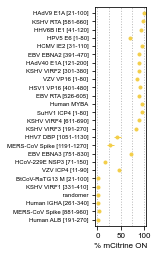

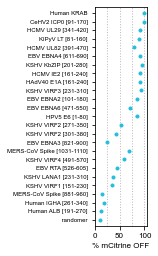

In [111]:
font = {'size':8,
        'family':'Arial'}
matplotlib.rc('font', **font)

def plot_validation_summary(df, screentype):
    if screentype == 'Activation':
        reporter = 'DY032'
        color = '#F3CE48'
        meancol = 'Norm Citrine ON'
        stdcol = 'ON std'
        xlabel = '% mCitrine ON'
        opposite = 'Repression'
        cutoff = 3e6
    elif screentype == 'Repression':
        reporter = 'JT039'
        color = '#23BEDB'
        meancol = 'Norm Citrine OFF'
        stdcol = 'OFF std'
        xlabel = '% mCitrine OFF'
        opposite = 'Activation'
        cutoff = 1e7
    
    df = df[(df['Screen']==screentype) & (~df[meancol].isna())].sort_values(by='Avg', ascending=False)
    df['Tile Start'] = np.where(df['Tile Start']=='', df['Tile Start'], df['Tile Start'].astype(str).str.split('.').str[0])
    df['Tile End'] = np.where(df['Tile End']=='', df['Tile End'], df['Tile End'].astype(str).str.split('.').str[0])
    df['Sample'] = np.where(df['Tile Start']=='', df['Virus Abbreviation'] + ' ' + df['Protein'],
                             df['Virus Abbreviation'] + ' ' + df['Protein'] + ' [' \
                             + df['Tile Start'] + '-' + df['Tile End'] + ']')
    
    samplelist = list(df['Sample'])
    ticklist = list(range(len(samplelist)))
    meanlist = list(df[meancol])
    stdlist = list(df[stdcol])
    
    fig, ax = plt.subplots(figsize=(2.2, 3.6))
    for s, t, m, sd in zip(samplelist, ticklist, meanlist, stdlist):
        ax.plot(m, t, marker='o', markersize=3, color=color)
        ax.errorbar(x=m, y=t, xerr=sd, lw=1, color=color)
    ax.set_xlabel(xlabel)
    ax.set_xticks(ticks=[0, 50, 100])
    for x in range(0, 101, 25):
        ax.axvline(x=x, ls=':', lw=1, color='#BBBBBB', zorder=-10)
    ax.set_yticks(ticks=ticklist)
    ax.set_yticklabels(labels=samplelist, fontsize=6)
    ax.set_ylim(ax.get_ylim()[0] + 0.5, ax.get_ylim()[1] - 0.5)
    ax.invert_yaxis()
    plt.tight_layout()
    plt.savefig('../Individual Figure Panels/Figure S1/vTR_%s_validation_summary.png' % screentype, dpi=1200)
        
plot_validation_summary(keyA, 'Activation')
plot_validation_summary(keyR, 'Repression')
print('Complete')

#### Contour plots featured in Fig. S1O&P

C:\Users\cludw\anaconda3\envs\cytoflow\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\cludw\anaconda3\envs\cytoflow\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


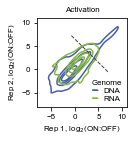

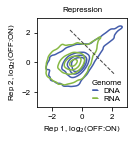

In [130]:
def plot_contour_genometype(df, screentype, cutoff):
    if screentype == 'Activation':
        score = 'ON:OFF'
        lims=[-8, 11]
        pad = 4
        ticks = [-5, 0, 5, 10]
    elif screentype == 'Repression':
        score = 'OFF:ON'
        lims=[-3, 3]
        pad = 1.5
        ticks = [-2, 0, 2]

    df = df[(df['Duplicate']==0) & (df['Screen']==screentype) & (df['Genome Type']!='-')]
    plt.figure(figsize=(1.9,2))
    pal = sns.color_palette(['#445DAB', '#86B843'])
    
    sns.kdeplot(data=df, x='R1', y='R2', hue='Genome Type', palette=pal, levels=5, linewidth=1)
    x = [cutoff-pad, cutoff+pad]
    y = [cutoff+pad, cutoff-pad]
    plt.plot(x, y, ls='--', color='#444444', lw=1)
    
    plt.xlabel('Rep 1, log$_2$(%s)' % score)
    plt.xlim(lims)
    plt.xticks(ticks)
    plt.ylabel('Rep 2, log$_2$(%s)' % score)
    plt.ylim(lims)
    plt.yticks(ticks)
    
    legend_elements = [Line2D([0], [0], marker='_', color='#445DAB', label='DNA'),
                       Line2D([0], [0], marker='_', color='#86B843', label='RNA')]
    plt.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1, 0), frameon=False,
               labelspacing=0.2, handlelength=0.5, borderpad=0.1, title='Genome', fontsize=8)
    plt.title(screentype, fontsize=8)
    plt.tight_layout()
    plt.savefig('../Individual Figure Panels/Figure S1/vTR_%s_DNA-vs-RNA_contour.png' % screentype, dpi=1200)
    

df = pd.read_csv('../Supplemental Tables - CSV/vTR-CoV-tiling/vTR-CoV_ActivD2-ReprD5_detailed.csv')
plot_contour_genometype(df, 'Activation', cutoffA_vTR)
plot_contour_genometype(df, 'Repression', cutoffR_vTR)
    